In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

stock_symbol = 'RELIANCE.NS'
start_date = '2021-01-01'
end_date = '2021-12-31'


In [4]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

data = stock_data['Close']


[*********************100%%**********************]  1 of 1 completed


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))


In [6]:
look_back = 10

def split_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

trainX, trainY = split_data(scaled_data, look_back)
testX, testY = split_data(scaled_data, look_back)


In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=50, batch_size=64)


Epoch 1/50
4/4 [==============================] - 13s 33ms/step - loss: 0.1610
Epoch 2/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0468
Epoch 3/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0240
Epoch 4/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0299
Epoch 5/50
4/4 [==============================] - 0s 30ms/step - loss: 0.0127
Epoch 6/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0178
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 0.0150
Epoch 8/50
4/4 [==============================] - 0s 34ms/step - loss: 0.0103
Epoch 9/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0101
Epoch 10/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0122
Epoch 11/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0087
Epoch 12/50
4/4 [==============================] - 0s 28ms/step - loss: 0.0085
Epoch 13/50
4/4 [==============================] - 0s 28ms/s

In [8]:
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 2s 11ms/step


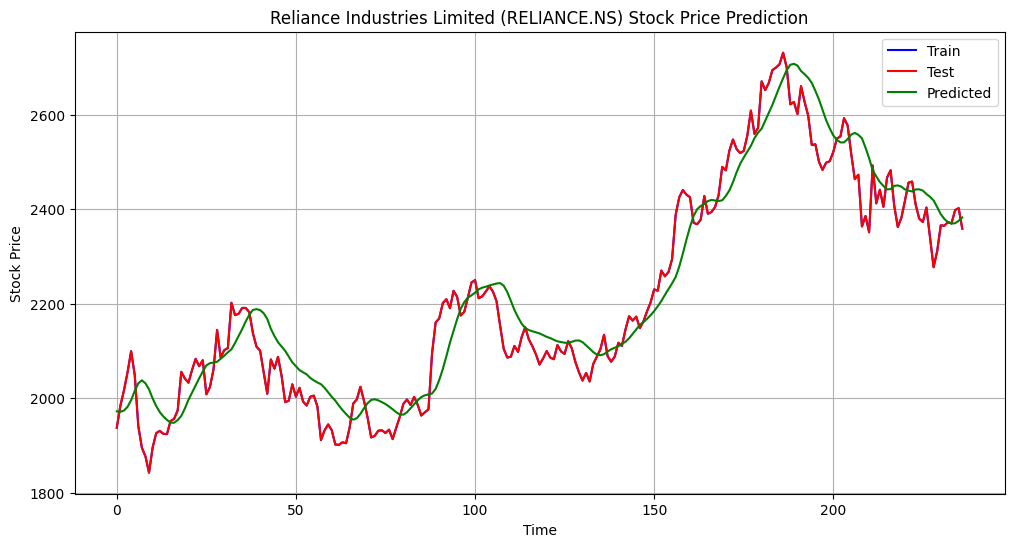

In [9]:
trainY = trainY.reshape(-1, 1)
trainY = scaler.inverse_transform(trainY)
testY = testY.reshape(-1, 1)
testY = scaler.inverse_transform(testY)


plt.figure(figsize=(12, 6))
plt.plot(trainY, color='blue', label='Train')
plt.plot(testY, color='red', label='Test')
plt.plot(predictions, color='green', label='Predicted')
plt.title('Reliance Industries Limited (RELIANCE.NS) Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)


plt.show()
